In [1]:

from abupy import ABuIndustries
r_symbol = 'AXP'

# Retrieving all stocks that belong to the same industry as Amex, and form a 3D Panel using pandas

p_date, _ = ABuIndustries.get_industries_panel_from_target(r_symbol,
                                                           show=False)

Box(children=(Text(value='pid=36773 begin work'), FloatProgress(value=0.0)))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/abupy/MarketBu/ABuIndustries.py:406: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  benchmark=benchmark, n_folds=n_folds)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/abupy/MarketBu/ABuIndustries.py:408: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this

In [3]:
type(p_date)


pandas.core.panel.Panel

In [8]:
p_date

NotImplementedError: 

In [5]:
p_date['usMCO'].head()

,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14
2017-06-05,118.86,119.450,118.62,0.034,118.92,118.82,509573.0,2.0171e+07,0.0,0.0,0.8300,0.8300
2017-06-06,117.77,118.370,117.40,-0.917,118.34,118.86,712882.0,2.0171e+07,1.0,1.0,1.1390,1.1461
2017-06-07,117.67,118.105,117.08,-0.085,117.98,117.77,676498.0,2.0171e+07,2.0,2.0,1.3734,1.3882
2017-06-08,117.38,118.040,117.22,-0.246,117.77,117.67,750145.0,2.0171e+07,3.0,3.0,1.2147,1.2144
2017-06-09,116.82,118.090,116.07,-0.477,117.61,117.38,545869.0,2.0171e+07,4.0,4.0,1.4078,1.4246


In [6]:

p_date_it = p_date.swapaxes('items', 'minor')
p_date_it

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  


<class 'pandas.core.panel.Panel'>
Dimensions: 12 (items) x 397 (major_axis) x 4 (minor_axis)
Items axis: close to atr14
Major_axis axis: 2017-06-05 00:00:00 to 2018-12-31 00:00:00
Minor_axis axis: usMCO to usAXP

In [9]:

p_date_it_close = p_date_it['close'].dropna(axis=0)
p_date_it_close.tail()

,usMCO,usMA,usV,usAXP
2018-12-24,129.35,174.65,121.73,89.50
2018-12-26,136.65,186.43,130.23,93.84
2018-12-27,136.65,186.43,130.23,93.84
2018-12-28,136.65,186.43,130.23,93.84
2018-12-31,136.65,186.43,130.23,93.84


Text(0.5, 0, 'Time')

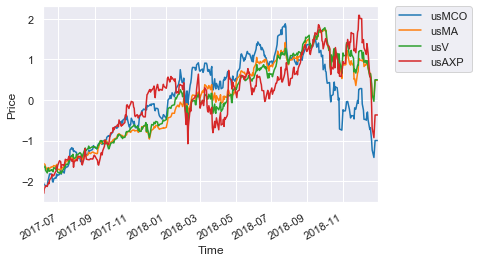

In [10]:

from abupy import ABuScalerUtil
from matplotlib import pyplot as plt

p_date_it_close = ABuScalerUtil.scaler_std(p_date_it_close)
p_date_it_close.plot()
plt.legend(bbox_to_anchor=(1.05, 
                           1),
           loc=2,
           borderaxespad=0)
plt.ylabel('Price')
plt.xlabel('Time')